# O'Sullivan / Koven method

In [1]:
# from IPython.display import Markdown, display
# display(Markdown("TracebilityText.md"))

### Loading required packages  and functions

In [2]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import numpy as np
from functools import lru_cache
import general_helpers as gh
from bgc_md2.resolve.mvars import (
    CompartmentalMatrix,
    InputTuple,
    StateVariableTuple
)

### Selecting models to compare

In [124]:
model_names={
    "ab_classic":"CLASSIC",  
    "clm5":"CLM5.0",
    #"kv_ft_dlem": "DLEM", 
    "bian_ibis2":"IBIS",    
    "cj_isam": "ISAM",    
    "isba-ctrip":"ISBA-CTRIP",    
    "jsbach":"JSBACH",
    "yz_jules": "JULES-ES-1p0",    
    "lpj-guess":"LPJ-GUESS",
    "lpjwsl":"LPJ",
    "lpx-bern":"LPX-Bern",
    "ORCHIDEE-V2":"OCN",    
    "ORCHIDEE":"ORCHIDEE",
    "ORCHIDEE-CNP":"ORCHIDEE-CNP",    
    "ORCHIDEEv3":"ORCHIDEEv3",
    "Aneesh_SDGVM":"SDGVM",
    "kv_visit2": "VISIT",
    "jon_yib": "YIBs"    
}
model_folders=[(k) for k in model_names]
m_names=list(model_names.values())
experiment_names_S2=list()
for name in m_names:
    experiment_names_S2.append(name + "_S2_") 
experiment_names_S3=list()
for name in m_names:
    experiment_names_S3.append(name + "_S3_") 
#experiment_names_S2

### Loading TRENDY data and model parameters

In [125]:
vars_all_list_S2=gh.get_vars_all_list(model_folders, experiment_names_S2)
vars_all_list_S3=gh.get_vars_all_list(model_folders, experiment_names_S3)

ab_classic

 Found cached global mean files. If you want to recompute the global means
            remove the following files: 
C:\Users\kv248\OneDrive - Cornell University\Data\Matrix MIP data\TRENDY\CLASSIC\CLASSIC_S2_gm_all_vars.nc
clm5

 Found cached global mean files. If you want to recompute the global means
            remove the following files: 
C:\Users\kv248\OneDrive - Cornell University\Data\Matrix MIP data\TRENDY\CLM5\CLM5.0_S2_gm_all_vars.nc
bian_ibis2

 Found cached global mean files. If you want to recompute the global means
            remove the following files: 
C:\Users\kv248\OneDrive - Cornell University\Data\Matrix MIP data\TRENDY\IBIS\IBIS_S2_gm_all_vars.nc
cj_isam

 Found cached global mean files. If you want to recompute the global means
            remove the following files: 
C:\Users\kv248\OneDrive - Cornell University\Data\Matrix MIP data\TRENDY\ISAM\ISAM_S2_gm_all_vars.nc
isba-ctrip

 Found cached global mean files. If you want to recompute the global mean

100%|██████████████████████████████████████████████████████████████████████████████| 320/320 [00:00<00:00, 1856.35it/s]


cVeg
5.331939934722783
C:\Users\kv248\OneDrive - Cornell University\Data\Matrix MIP data\TRENDY\OCN\OCN_S2_cLitter.nc


100%|██████████████████████████████████████████████████████████████████████████████| 320/320 [00:00<00:00, 1990.69it/s]


cLitter
2.776006275855582
C:\Users\kv248\OneDrive - Cornell University\Data\Matrix MIP data\TRENDY\OCN\OCN_S2_cSoil.nc


100%|██████████████████████████████████████████████████████████████████████████████| 320/320 [00:00<00:00, 1746.93it/s]


cSoil
10.103955819850102
C:\Users\kv248\OneDrive - Cornell University\Data\Matrix MIP data\TRENDY\OCN\OCN_S2_gpp.nc


100%|████████████████████████████████████████████████████████████████████████████| 3840/3840 [00:02<00:00, 1875.32it/s]


gpp
3.448700047771546e-08
C:\Users\kv248\OneDrive - Cornell University\Data\Matrix MIP data\TRENDY\OCN\OCN_S2_npp.nc


100%|████████████████████████████████████████████████████████████████████████████| 3840/3840 [00:02<00:00, 1887.02it/s]


npp
1.7234455837696927e-08
C:\Users\kv248\OneDrive - Cornell University\Data\Matrix MIP data\TRENDY\OCN\OCN_S1_ra.nc


100%|████████████████████████████████████████████████████████████████████████████| 3840/3840 [00:01<00:00, 2144.83it/s]


ra
1.7172237508111096e-08
C:\Users\kv248\OneDrive - Cornell University\Data\Matrix MIP data\TRENDY\OCN\OCN_S1_rh.nc


100%|████████████████████████████████████████████████████████████████████████████| 3840/3840 [00:01<00:00, 2112.31it/s]


rh
1.68838102669592e-08
ORCHIDEE

 Found cached global mean files. If you want to recompute the global means
            remove the following files: 
C:\Users\kv248\OneDrive - Cornell University\Data\Matrix MIP data\TRENDY\ORCHIDEE\ORCHIDEE_S2_gm_all_vars.nc
ORCHIDEE-CNP

 Found cached global mean files. If you want to recompute the global means
            remove the following files: 
C:\Users\kv248\OneDrive - Cornell University\Data\Matrix MIP data\TRENDY\ORCHIDEE-CNP\ORCHIDEE-CNP_S2_gm_all_vars.nc
ORCHIDEEv3

 Found cached global mean files. If you want to recompute the global means
            remove the following files: 
C:\Users\kv248\OneDrive - Cornell University\Data\Matrix MIP data\TRENDY\ORCHIDEEv3\ORCHIDEEv3_S2_gm_all_vars.nc
Aneesh_SDGVM

 Found cached global mean files. If you want to recompute the global means
            remove the following files: 
C:\Users\kv248\OneDrive - Cornell University\Data\Matrix MIP data\TRENDY\SDGVM\SDGVM_S2_gm_all_vars.nc
kv_visit2

 Found ca

100%|██████████████████████████████████████████████████████████████████████████████| 320/320 [00:00<00:00, 1330.69it/s]


cVeg
4.829633894044061
C:\Users\kv248\OneDrive - Cornell University\Data\Matrix MIP data\TRENDY\OCN\OCN_S3_cLitter.nc


100%|██████████████████████████████████████████████████████████████████████████████| 320/320 [00:00<00:00, 1893.05it/s]


cLitter
2.5790447468094935
C:\Users\kv248\OneDrive - Cornell University\Data\Matrix MIP data\TRENDY\OCN\OCN_S3_cSoil.nc


100%|██████████████████████████████████████████████████████████████████████████████| 320/320 [00:00<00:00, 1780.11it/s]


cSoil
10.118214717671608
C:\Users\kv248\OneDrive - Cornell University\Data\Matrix MIP data\TRENDY\OCN\OCN_S3_gpp.nc


100%|████████████████████████████████████████████████████████████████████████████| 3840/3840 [00:02<00:00, 1828.94it/s]


gpp
3.447032128494537e-08
C:\Users\kv248\OneDrive - Cornell University\Data\Matrix MIP data\TRENDY\OCN\OCN_S3_npp.nc


100%|████████████████████████████████████████████████████████████████████████████| 3840/3840 [00:02<00:00, 1891.54it/s]


npp
1.732492574592762e-08
C:\Users\kv248\OneDrive - Cornell University\Data\Matrix MIP data\TRENDY\OCN\OCN_S3_ra.nc


100%|████████████████████████████████████████████████████████████████████████████| 3840/3840 [00:02<00:00, 1815.82it/s]


ra
1.7145395539133482e-08
C:\Users\kv248\OneDrive - Cornell University\Data\Matrix MIP data\TRENDY\OCN\OCN_S3_rh.nc


100%|████████████████████████████████████████████████████████████████████████████| 3840/3840 [00:02<00:00, 1819.50it/s]

rh
1.697462585968776e-08
ORCHIDEE

 Found cached global mean files. If you want to recompute the global means
            remove the following files: 
C:\Users\kv248\OneDrive - Cornell University\Data\Matrix MIP data\TRENDY\ORCHIDEE\ORCHIDEE_S3_gm_all_vars.nc
ORCHIDEE-CNP

 Found cached global mean files. If you want to recompute the global means
            remove the following files: 
C:\Users\kv248\OneDrive - Cornell University\Data\Matrix MIP data\TRENDY\ORCHIDEE-CNP\ORCHIDEE-CNP_S3_gm_all_vars.nc
ORCHIDEEv3

 Found cached global mean files. If you want to recompute the global means
            remove the following files: 
C:\Users\kv248\OneDrive - Cornell University\Data\Matrix MIP data\TRENDY\ORCHIDEEv3\ORCHIDEEv3_S3_gm_all_vars.nc
Aneesh_SDGVM

 Found cached global mean files. If you want to recompute the global means
            remove the following files: 
C:\Users\kv248\OneDrive - Cornell University\Data\Matrix MIP data\TRENDY\SDGVM\SDGVM_S3_gm_all_vars.nc
kv_visit2

 Found c

In [126]:
np.mean(vars_all_list_S2[10].ra)

0.0014836813207007985

In [127]:
# define same step size for all models (in days)
delta_t_val=30

In [128]:
all_comp_dict_S2=gh.get_components_from_output(model_names=model_names,
             vars_all_list=vars_all_list_S2,
             delta_t_val=delta_t_val, 
             #model_cols=model_cols,
             part=1,
             #averaging=12*30//delta_t_val, # yearly averaging
             #averaging=30//delta_t_val, # monthly averaging
             #overlap=True
             )
all_comp_dict_S3=gh.get_components_from_output(model_names=model_names,
             vars_all_list=vars_all_list_S3,
             delta_t_val=delta_t_val, 
             #model_cols=model_cols,
             part=1,
             #averaging=12*30//delta_t_val, # yearly averaging
             #averaging=30//delta_t_val, # monthly averaging
             #overlap=True
             )

120
Getting traceable components for ab_classic...
Getting traceable components for clm5...
Getting traceable components for bian_ibis2...
Getting traceable components for cj_isam...
Getting traceable components for isba-ctrip...
Getting traceable components for jsbach...
Getting traceable components for yz_jules...
Getting traceable components for lpj-guess...
Getting traceable components for lpjwsl...
Getting traceable components for lpx-bern...
Getting traceable components for ORCHIDEE-V2...
Getting traceable components for ORCHIDEE...
Getting traceable components for ORCHIDEE-CNP...
Getting traceable components for ORCHIDEEv3...
Getting traceable components for Aneesh_SDGVM...
Getting traceable components for kv_visit2...
Getting traceable components for jon_yib...
120
Getting traceable components for ab_classic...
Getting traceable components for clm5...
Getting traceable components for bian_ibis2...
Getting traceable components for cj_isam...
Getting traceable components for isba

In [129]:
all_comp_dict_S2["OCN"]["ra"]

array([0.00147896, 0.0014659 , 0.00147134, 0.001459  , 0.0014701 ,
       0.00145978, 0.00147229, 0.00149396, 0.00148413, 0.00150508,
       0.00148545, 0.00148806, 0.00149539, 0.00148528, 0.0014768 ,
       0.00147082, 0.00148938, 0.00146381, 0.00148404, 0.00149328,
       0.00150646, 0.00148373, 0.00150041, 0.00151308, 0.00151974,
       0.00151657, 0.0014837 , 0.00149578, 0.0015241 , 0.00151229,
       0.00149885, 0.00151222, 0.00148712, 0.00148592, 0.00149132,
       0.00150278, 0.00149506, 0.00150021, 0.0015285 , 0.00151421,
       0.00150551, 0.00151224, 0.00150411, 0.00151722, 0.0015195 ,
       0.00150912, 0.00150264, 0.00149004, 0.00152536, 0.00153544,
       0.00152058, 0.0015273 , 0.00151398, 0.00151294, 0.00152517,
       0.00151673, 0.00152071, 0.00152836, 0.00154578, 0.00151912,
       0.00152545, 0.0015069 , 0.00149132, 0.00151742, 0.00152392,
       0.00155594, 0.00153794, 0.00154039, 0.00153803, 0.00153058,
       0.00153531, 0.00152489, 0.00152642, 0.00155346, 0.00153

### Plots of traceable components and their uncertainty

In [130]:
plt.rcParams.update({'font.size': 15})
import plotly.express as px
cols = px.colors.qualitative.Light24
model_cols = {m_names[i]: cols[i] for i in range(len(m_names))}
# import seaborn as sns # requires installation of the "seaborn" package (not part of bgc_md2)
#cols = sns.color_palette("tab20", len(m_names))
# cols = sns.color_palette("cubehelix", len(m_names))

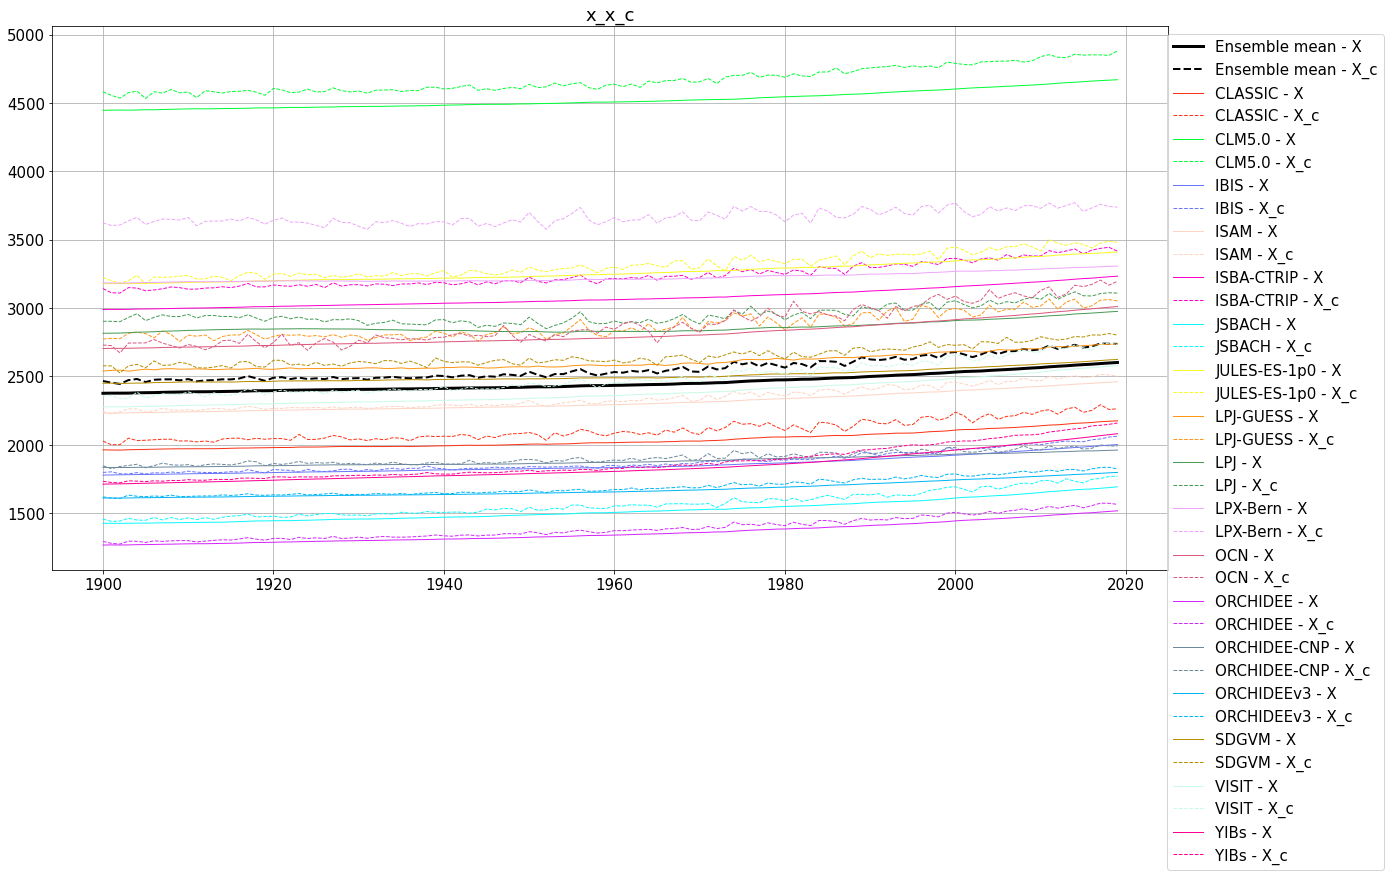

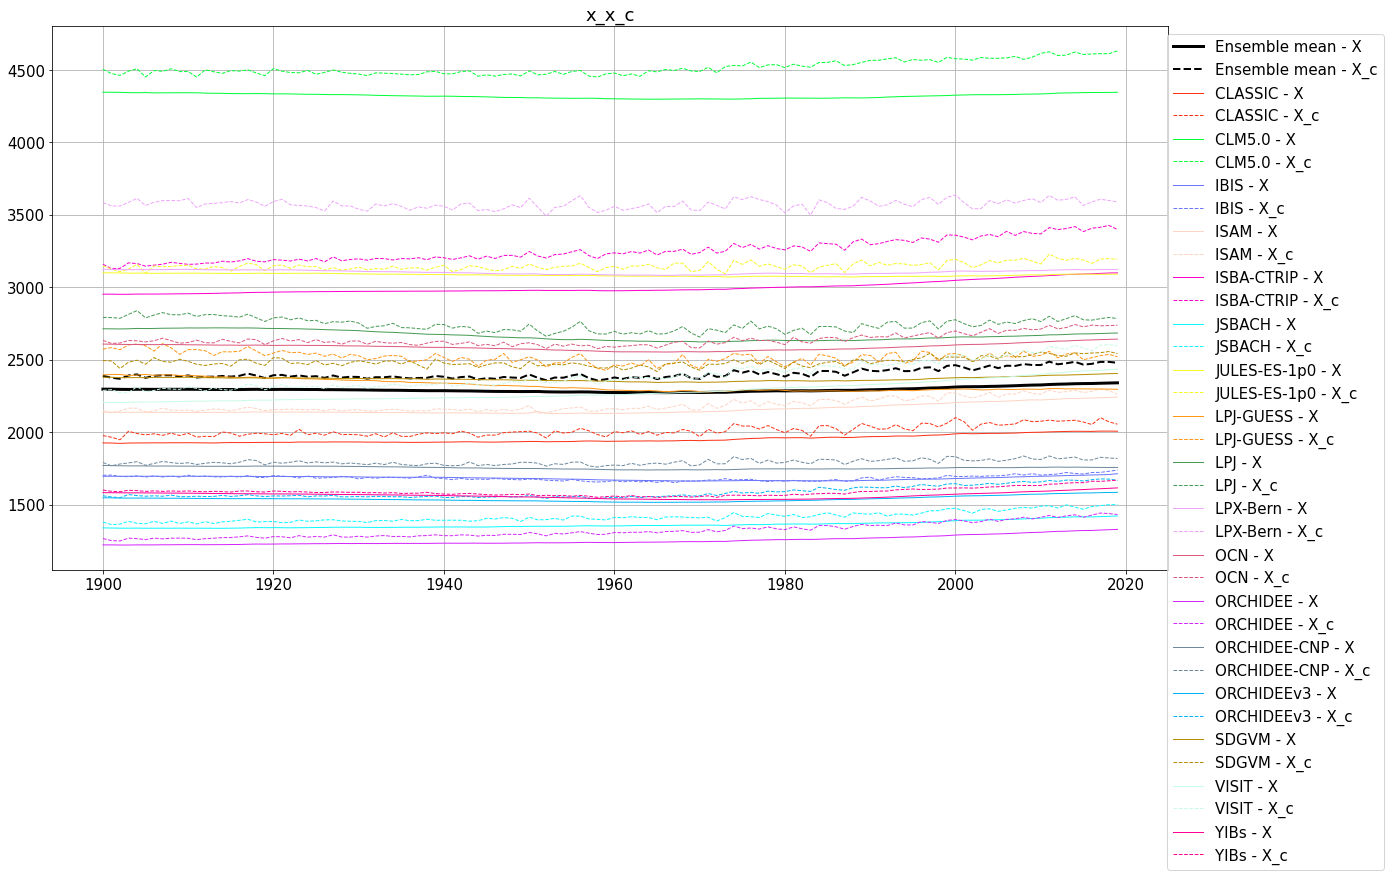

In [131]:
x_x_c1,sigma_x_x_c1=gh.plot_traceable_component(
    all_comp_dict_S2,
    "x_x_c",
    model_cols,
    #delta=True,
)
x_x_c2,sigma_x_x_c2=gh.plot_traceable_component(
    all_comp_dict_S3,
    "x_x_c",
    model_cols,
    #delta=True,
)

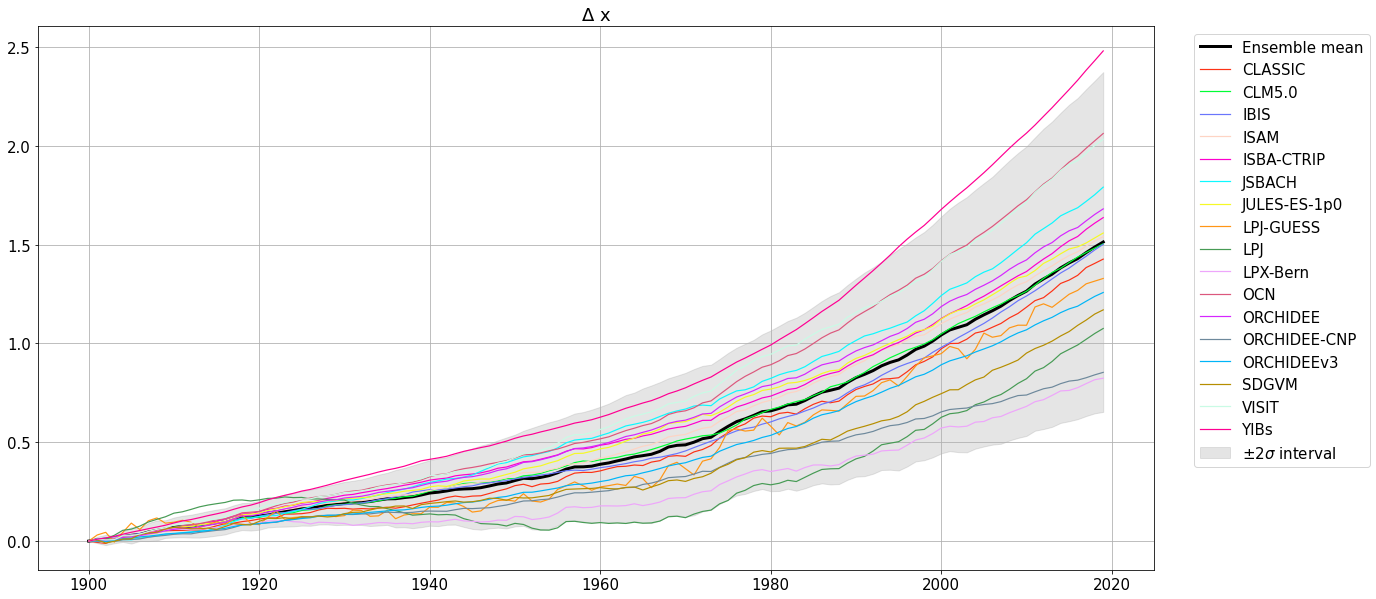

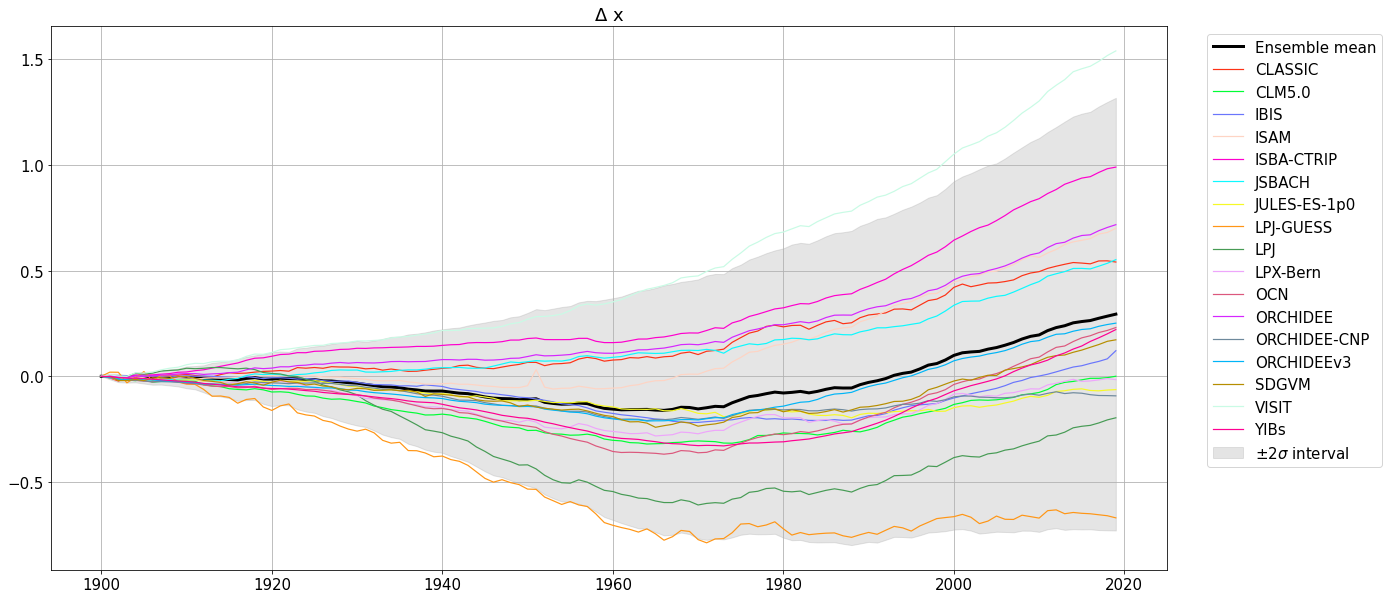

In [132]:
x1,sigma_x1=gh.plot_traceable_component(
    all_comp_dict_S2,
    "x",
    model_cols,
    delta=True,
)
x2,sigma_x2=gh.plot_traceable_component(
    all_comp_dict_S3,
    "x",
    model_cols,
    delta=True,
)

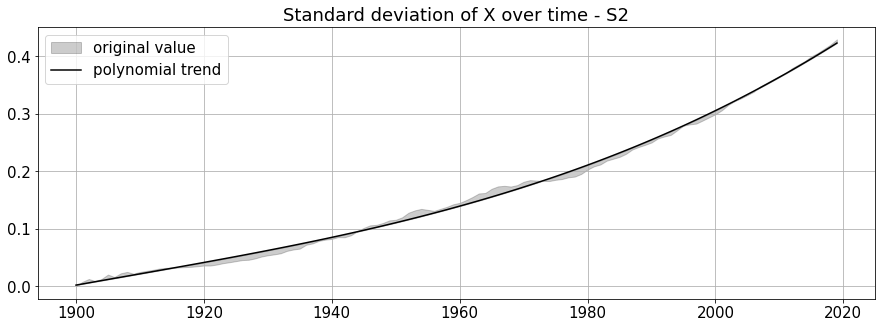

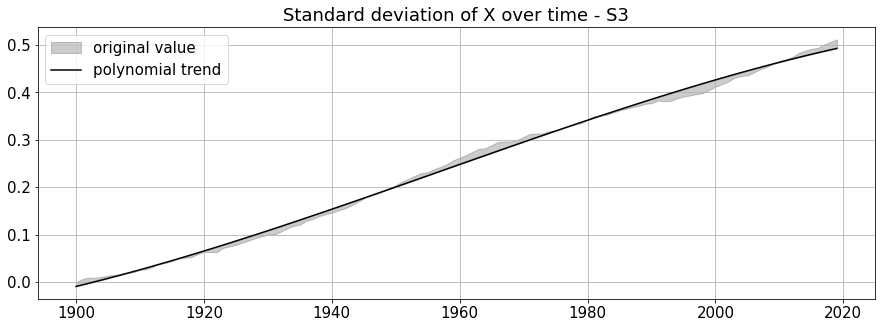

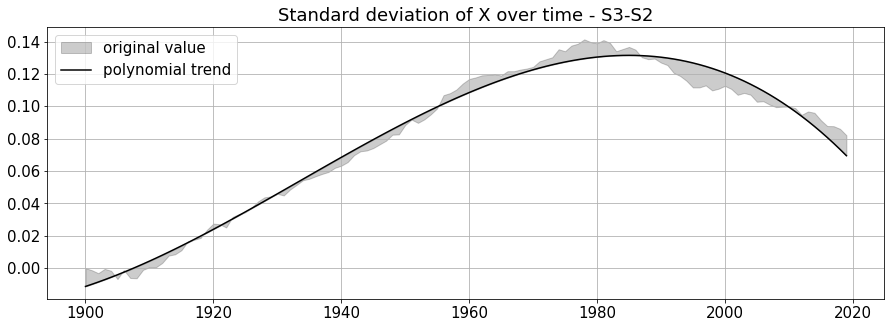

In [134]:
times=all_comp_dict_S2["Times"]
var=sigma_x1
gh.plot_single_trend(var,times,3,"Standard deviation of X over time - S2")

times=all_comp_dict_S3["Times"]
var=sigma_x2
gh.plot_single_trend(var,times,3, "Standard deviation of X over time - S3")

times=all_comp_dict_S3["Times"]
var=sigma_x2-sigma_x1
gh.plot_single_trend(var,times,3, "Standard deviation of X over time - S3-S2")

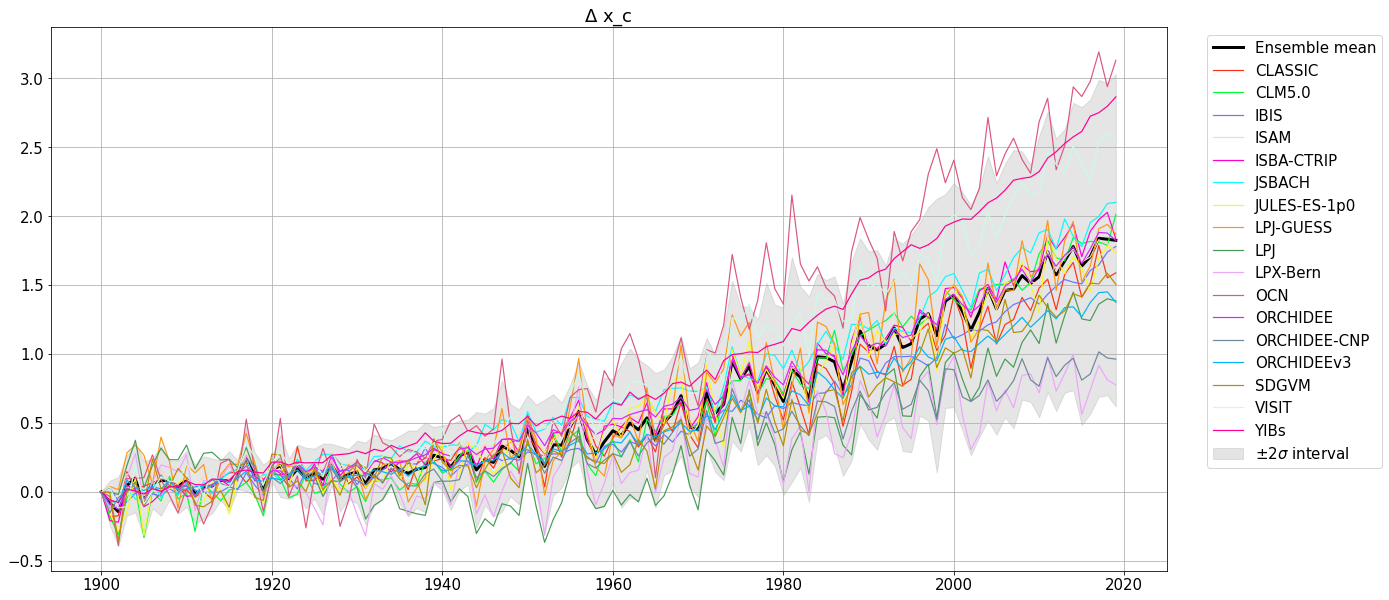

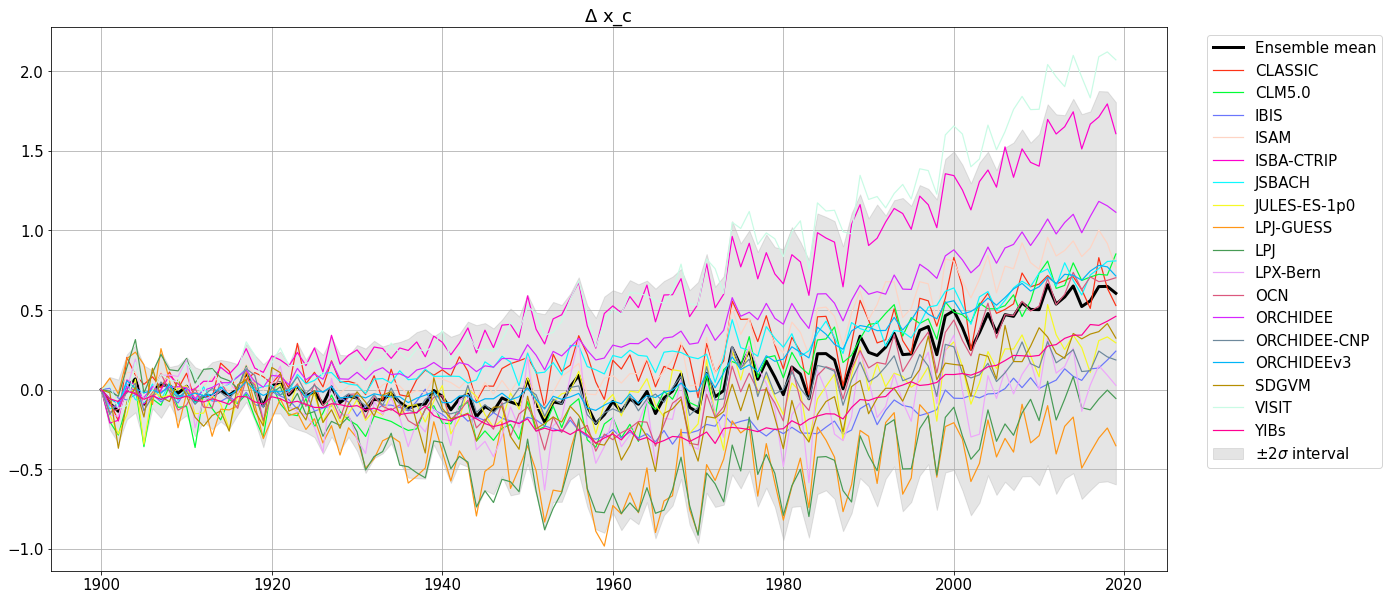

In [135]:
x_c1,sigma_x_c1=gh.plot_traceable_component(
    all_comp_dict_S2,
    "x_c",
    model_cols,
    delta=True,
)
x_c2,sigma_x_c2=gh.plot_traceable_component(
    all_comp_dict_S3,
    "x_c",
    model_cols,
    delta=True,
)

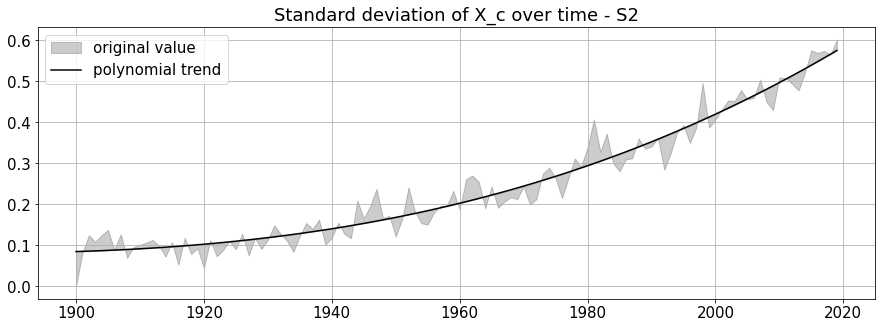

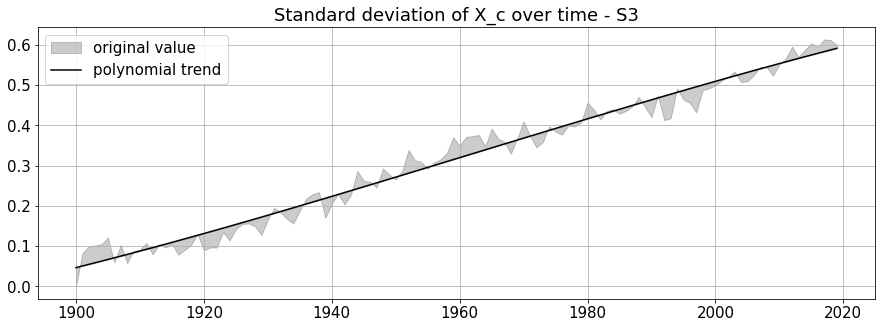

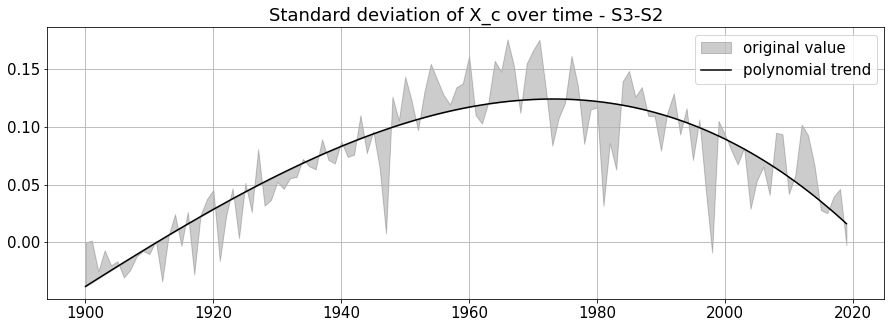

In [136]:
times=all_comp_dict_S2["Times"]
var=sigma_x_c1
gh.plot_single_trend(var,times,3,"Standard deviation of X_c over time - S2")

times=all_comp_dict_S3["Times"]
var=sigma_x_c2
gh.plot_single_trend(var,times,3, "Standard deviation of X_c over time - S3")

times=all_comp_dict_S3["Times"]
var=sigma_x_c2-sigma_x_c1
gh.plot_single_trend(var,times,3, "Standard deviation of X_c over time - S3-S2")

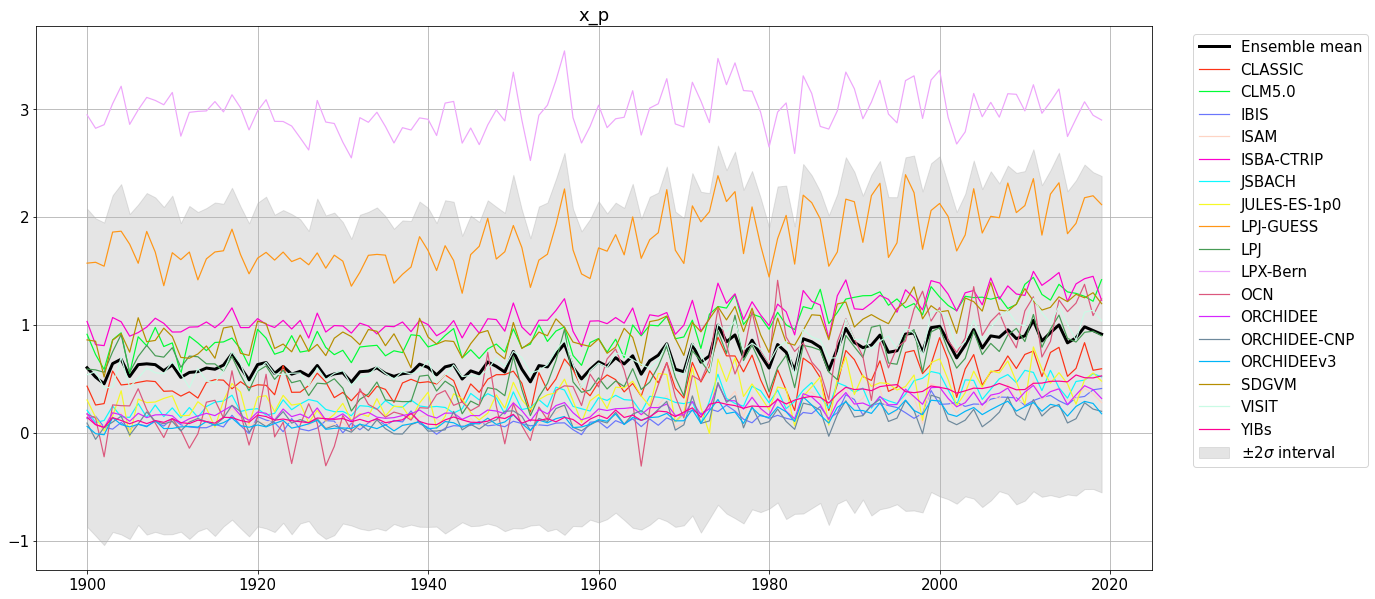

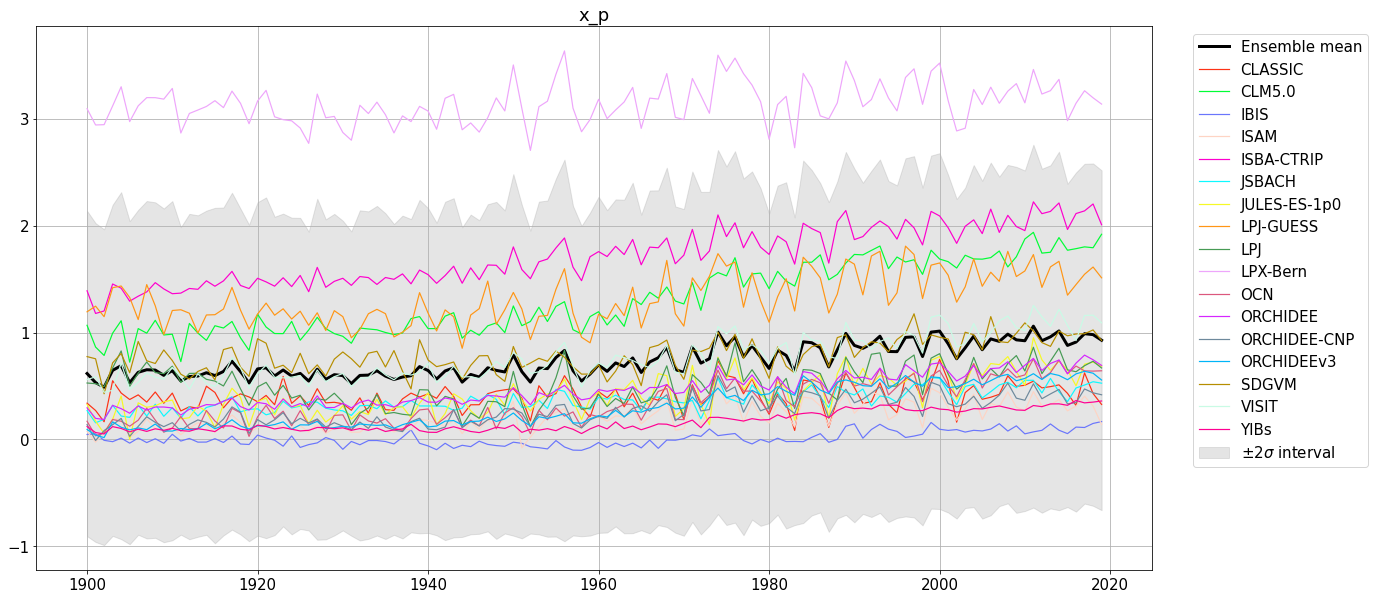

In [137]:
x_p1,sigma_x_p1=gh.plot_traceable_component(
    all_comp_dict_S2,
    "x_p",
    model_cols,
    #delta=True,
)
x_p2,sigma_x_p2=gh.plot_traceable_component(
    all_comp_dict_S3,
    "x_p",
    model_cols,
    #delta=True,
)

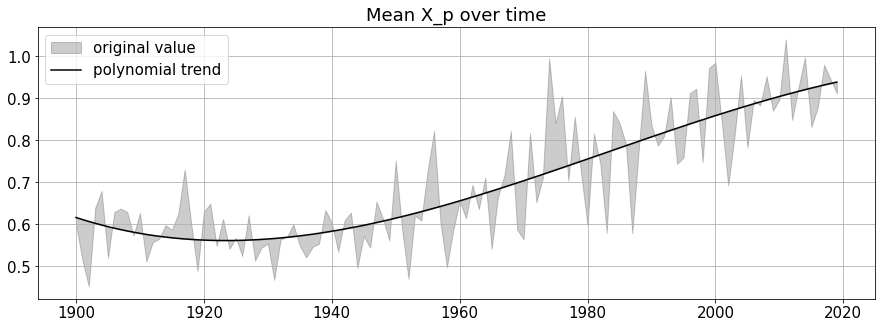

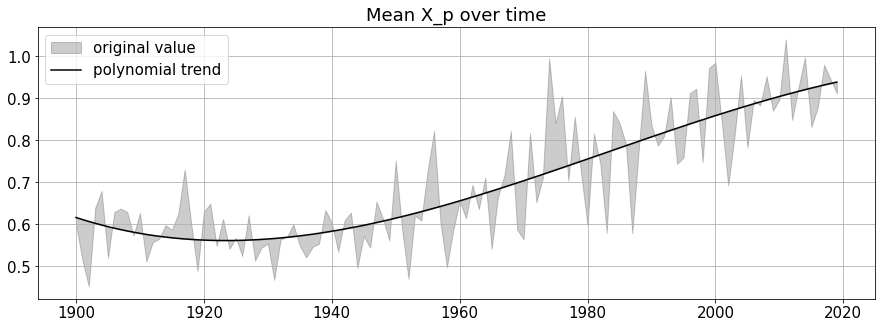

In [138]:
times=all_comp_dict_S2["Times"]
var=x_p1
gh.plot_single_trend(var,times,3,"Mean X_p over time")
times=all_comp_dict_S3["Times"]
var=x_p1
gh.plot_single_trend(var,times,3,"Mean X_p over time")

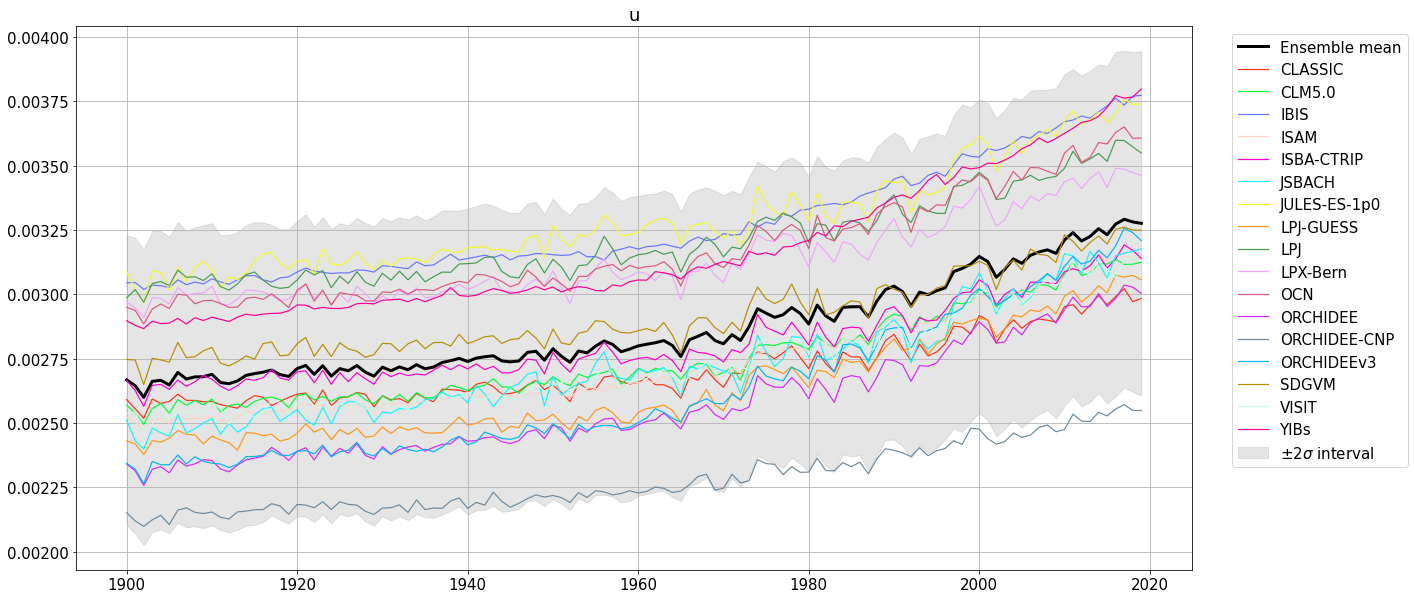

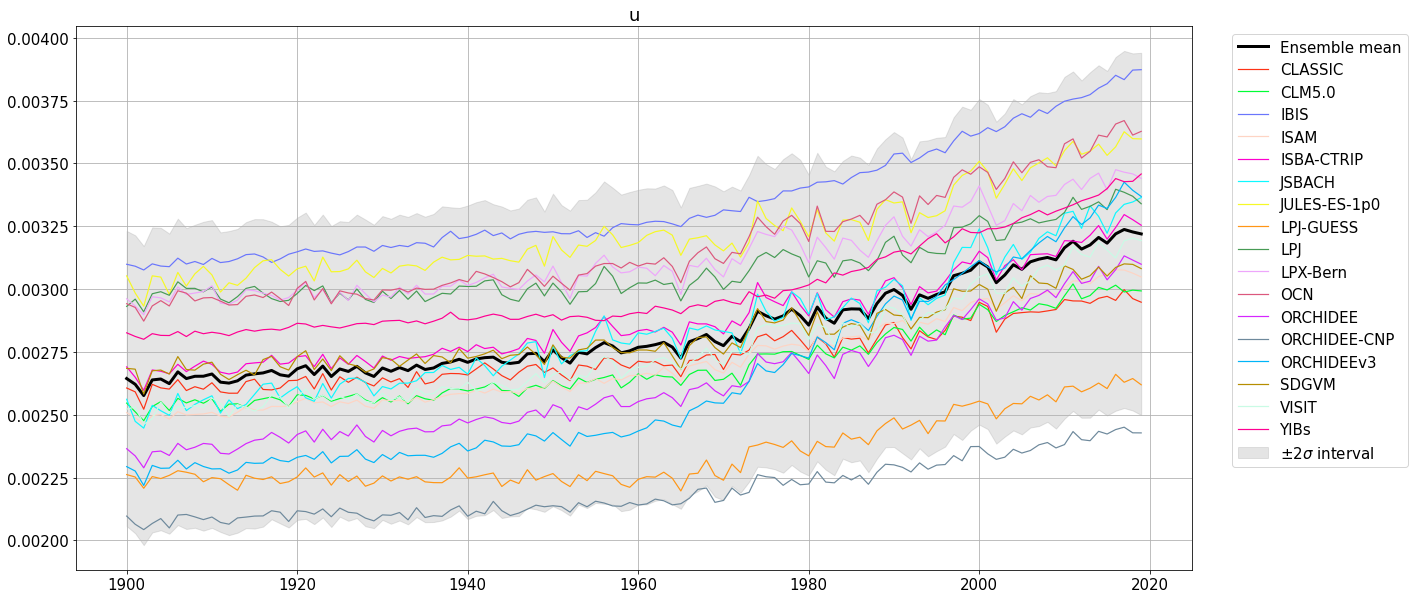

In [139]:
u1, sigma_u1=gh.plot_traceable_component(
    all_comp_dict_S2,
    "u",
    model_cols,
    #delta=True,
)
u2, sigma_u2=gh.plot_traceable_component(
    all_comp_dict_S3,
    "u",
    model_cols,
    #delta=True,
)

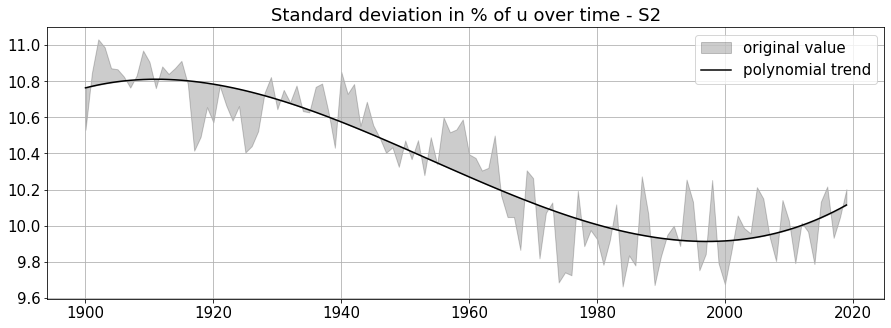

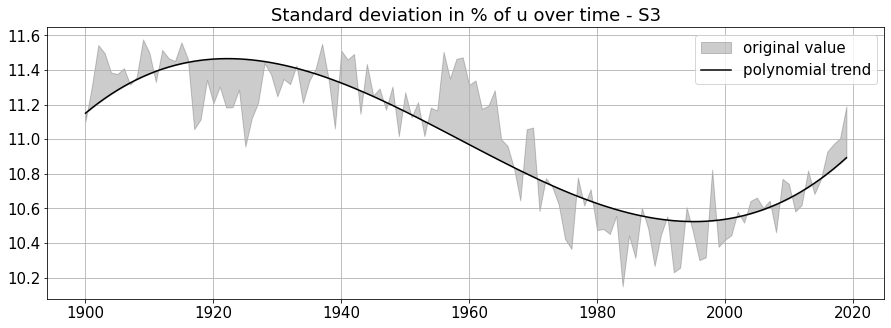

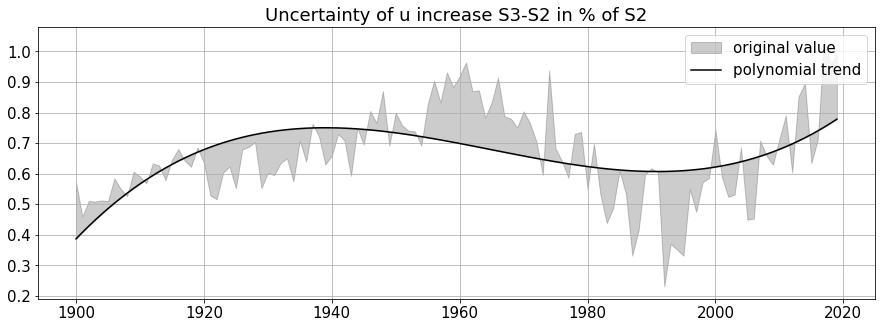

In [140]:
times=all_comp_dict_S2["Times"]
var=sigma_u1/u1*100
gh.plot_single_trend(var,times,3,"Standard deviation in % of u over time - S2")

times=all_comp_dict_S3["Times"]
var=sigma_u2/u2*100
gh.plot_single_trend(var,times,3, "Standard deviation in % of u over time - S3")

times=all_comp_dict_S3["Times"]
var=(sigma_u2/u2*100-sigma_u1/u1*100)
gh.plot_single_trend(var,times,3, "Uncertainty of u increase S3-S2 in % of S2")

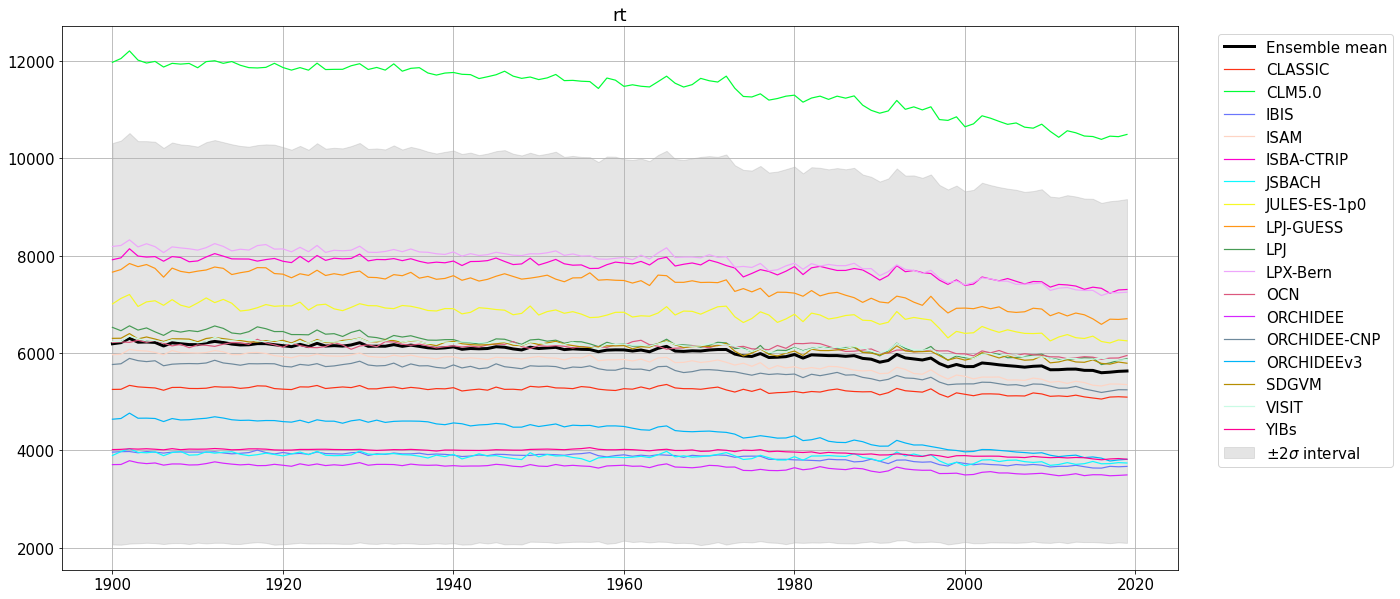

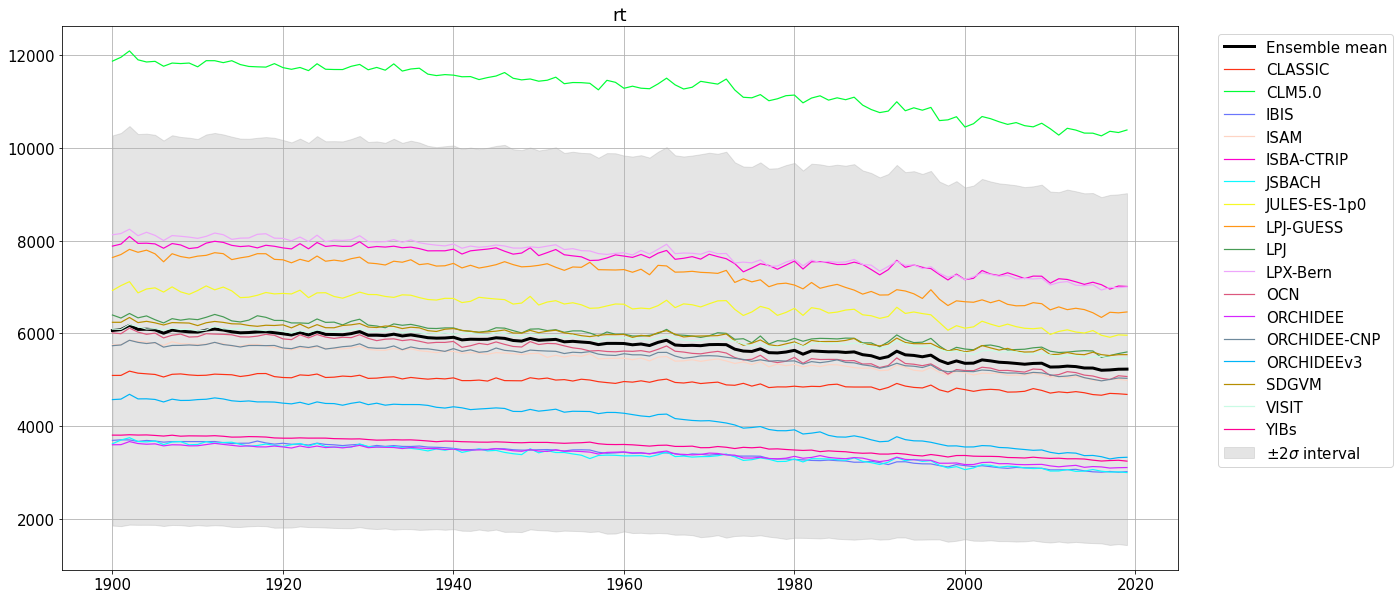

In [141]:
rt1,sigma_rt1=gh.plot_traceable_component(
    all_comp_dict_S2,
    "rt",
    model_cols,
    #delta=True,
)
rt2,sigma_rt2=gh.plot_traceable_component(
    all_comp_dict_S3,
    "rt",
    model_cols,
    #delta=True,
)

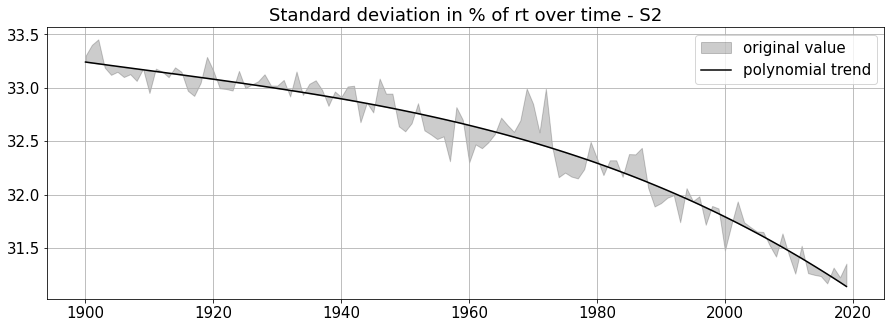

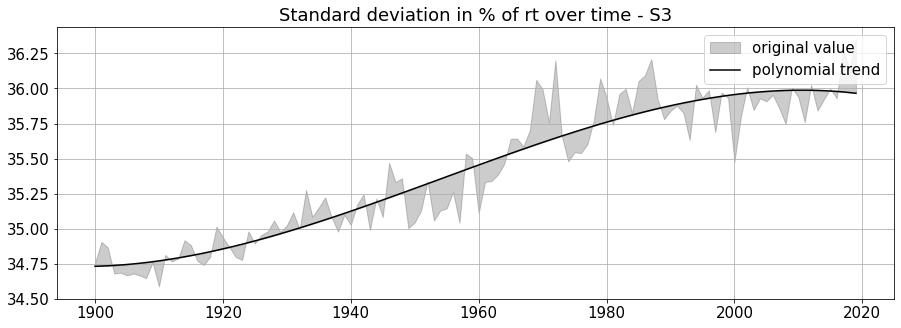

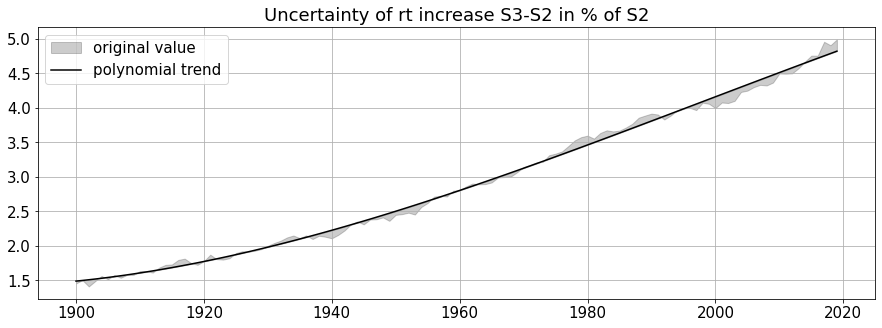

In [142]:
times=all_comp_dict_S2["Times"]
var=sigma_rt1/rt1*100
gh.plot_single_trend(var,times,3,"Standard deviation in % of rt over time - S2")

times=all_comp_dict_S3["Times"]
var=sigma_rt2/rt2*100
gh.plot_single_trend(var,times,3, "Standard deviation in % of rt over time - S3")

times=all_comp_dict_S3["Times"]
var=(sigma_rt2/rt2*100-sigma_rt1/rt1*100)
gh.plot_single_trend(var,times,3, "Uncertainty of rt increase S3-S2 in % of S2")

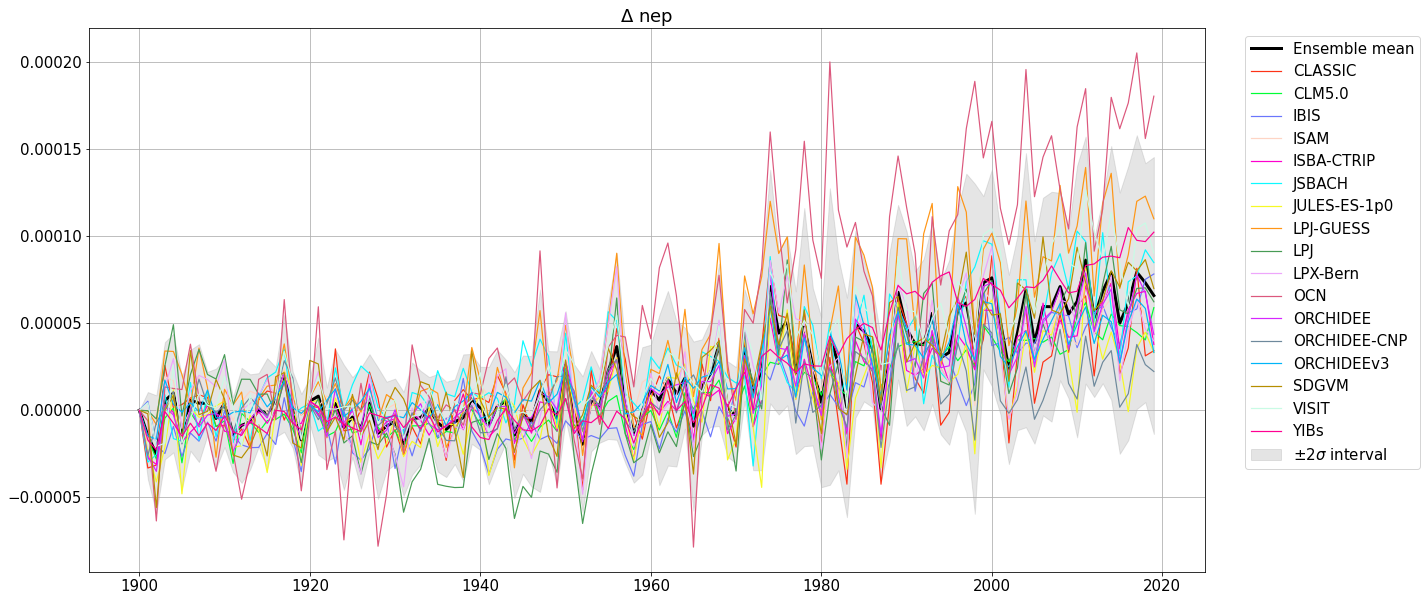

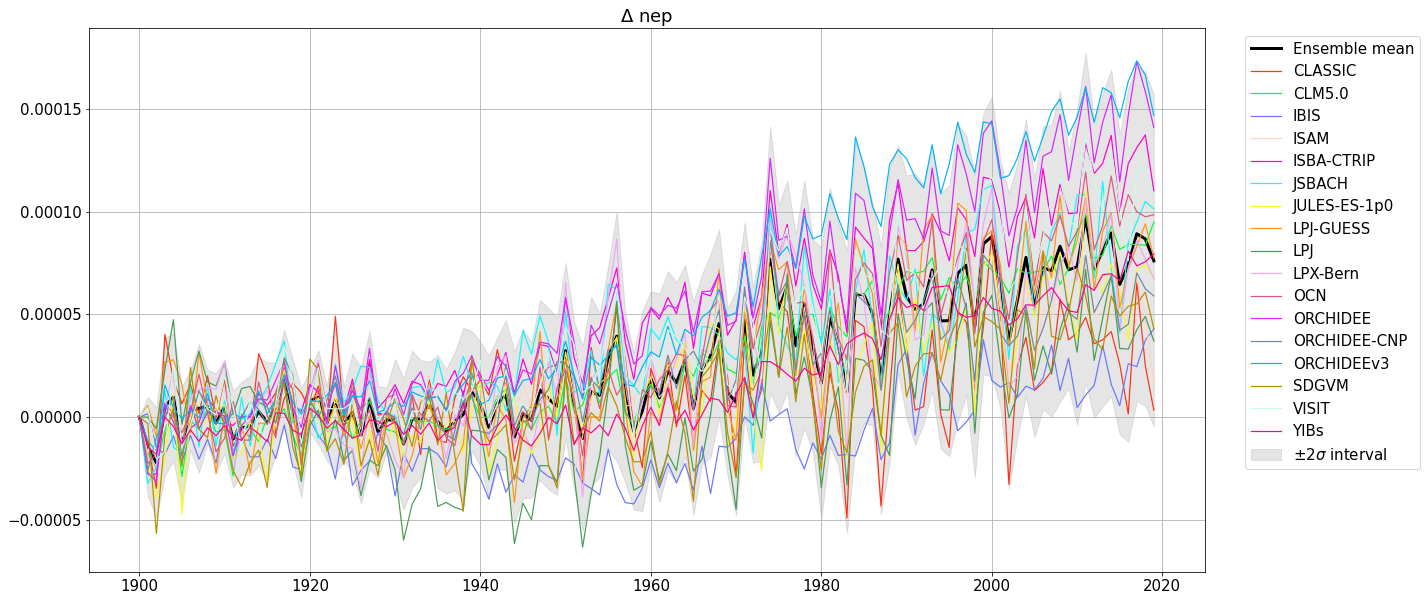

In [143]:
nep1,sigma_nep1=gh.plot_traceable_component(
    all_comp_dict_S2,
    "nep",
    model_cols,
    delta=True,
)
nep2,sigma_nep2=gh.plot_traceable_component(
    all_comp_dict_S3,
    "nep",
    model_cols,
    delta=True,
)

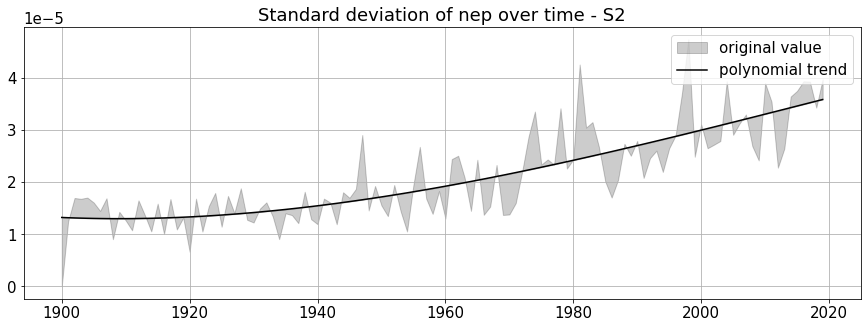

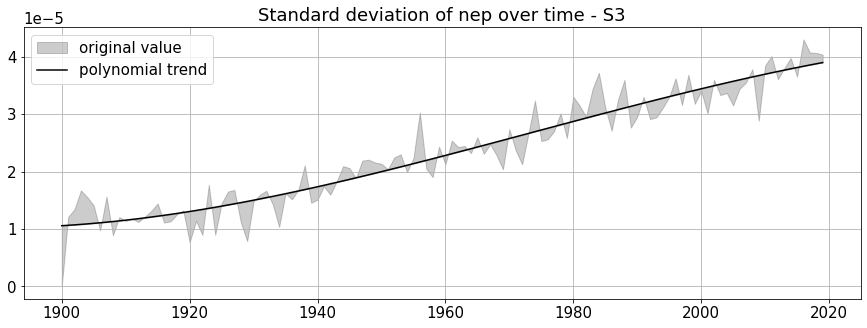

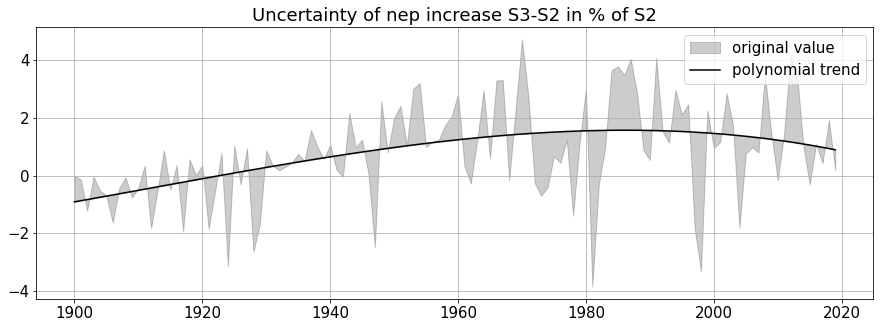

In [144]:
times=all_comp_dict_S2["Times"]
var=sigma_nep1
gh.plot_single_trend(var,times,3,"Standard deviation of nep over time - S2")

times=all_comp_dict_S3["Times"]
var=sigma_nep2
gh.plot_single_trend(var,times,3, "Standard deviation of nep over time - S3")

times=all_comp_dict_S3["Times"]
var=(sigma_nep2-sigma_nep1)/sigma_u1*100
gh.plot_single_trend(var,times,3, "Uncertainty of nep increase S3-S2 in % of S2")

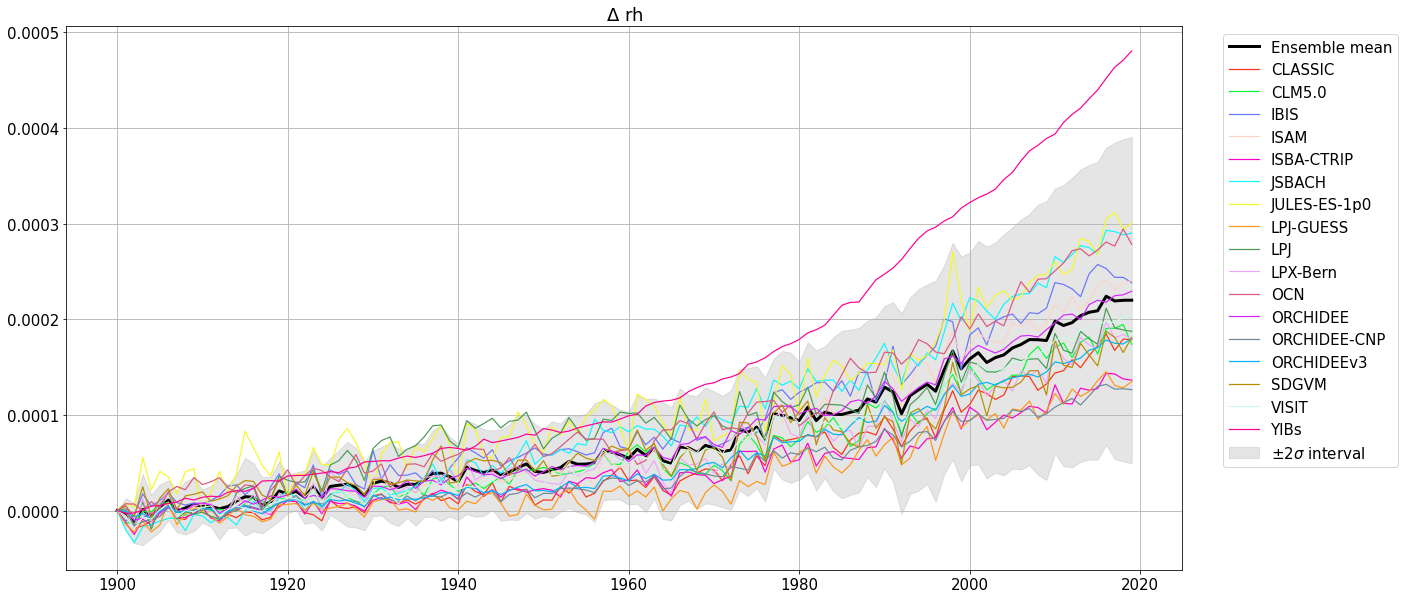

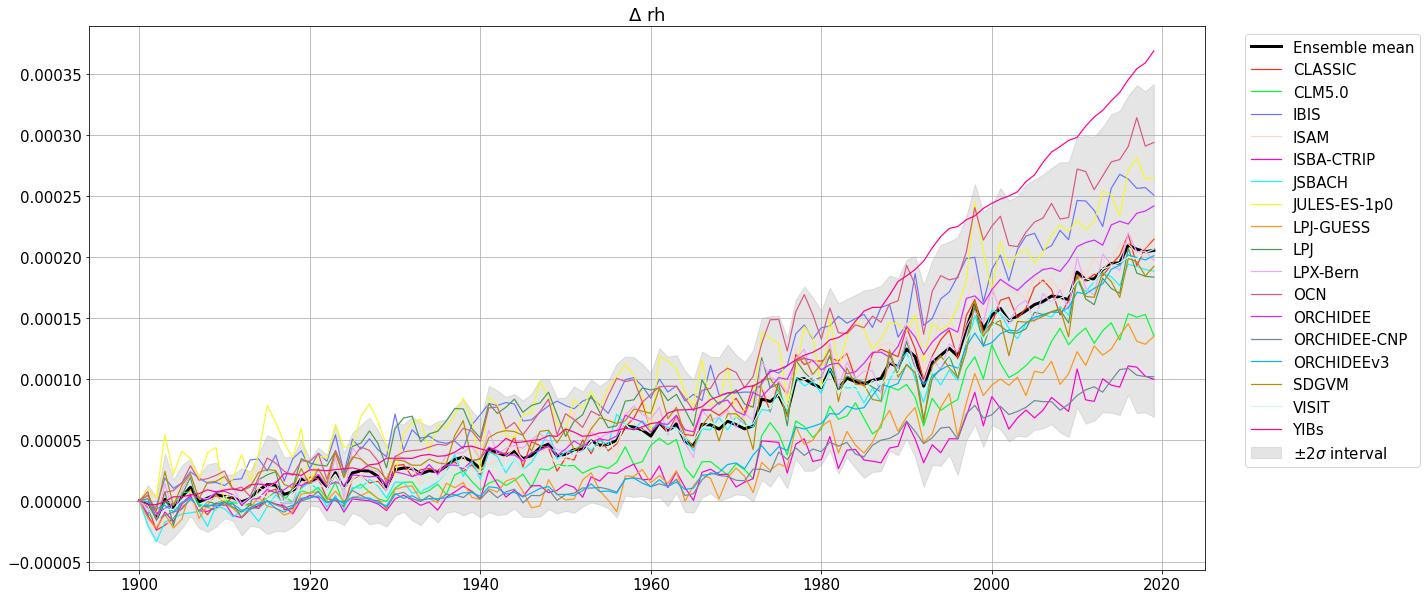

In [145]:
rh1,sigma_rh1=gh.plot_traceable_component(
    all_comp_dict_S2,
    "rh",
    model_cols,
    delta=True,
)
rh2,sigma_rh2=gh.plot_traceable_component(
    all_comp_dict_S3,
    "rh",
    model_cols,
    delta=True,
)

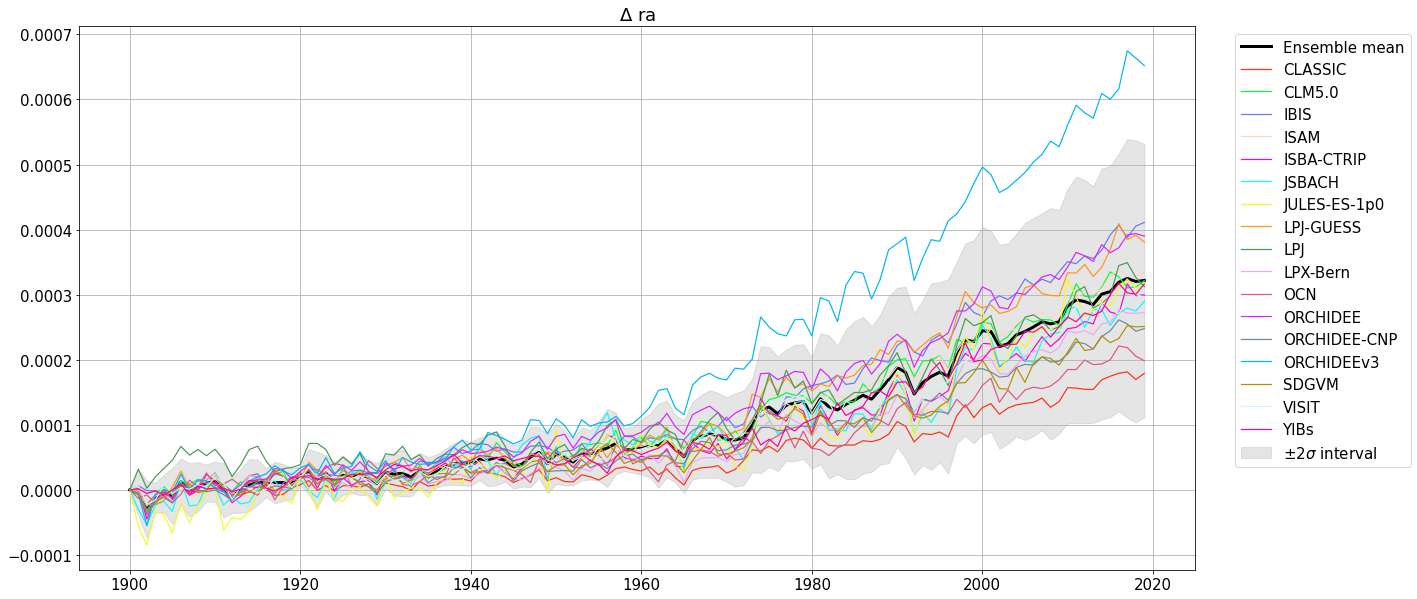

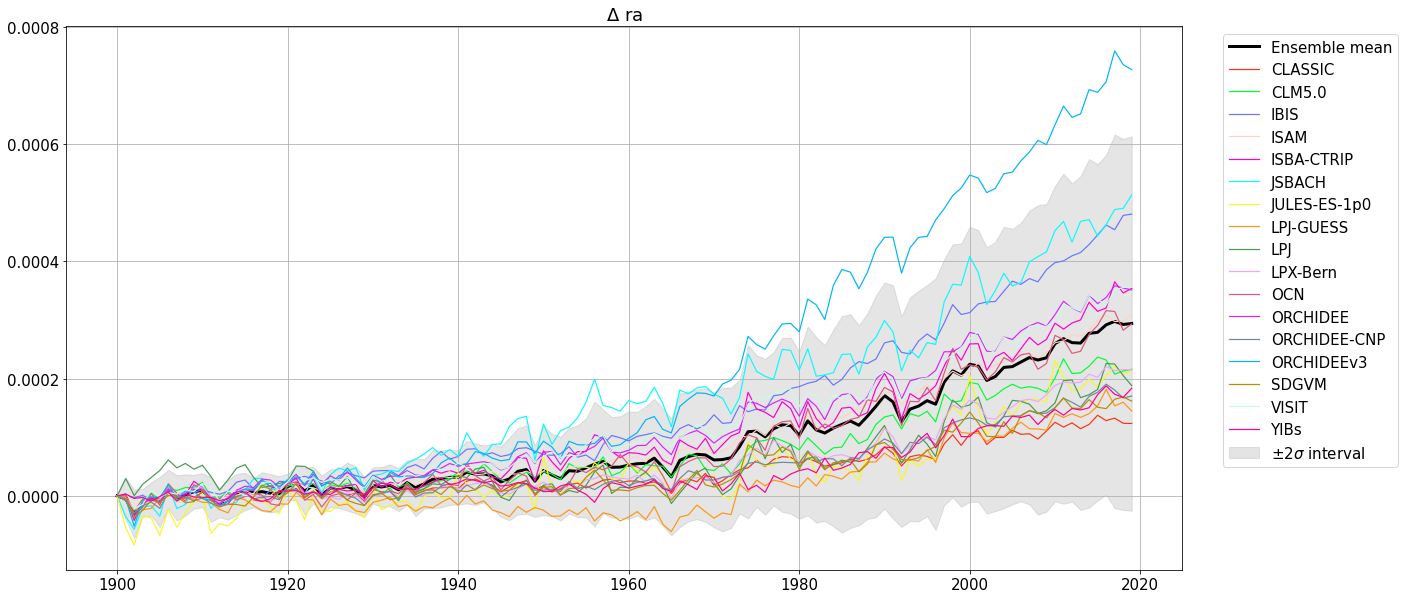

In [146]:
ra1,sigma_ra1=gh.plot_traceable_component(
    all_comp_dict_S2,
    "ra",
    model_cols,
    delta=True,
)
ra2,sigma_ra2=gh.plot_traceable_component(
    all_comp_dict_S3,
    "ra",
    model_cols,
    delta=True,
)

### Uncertainty attribution

In [147]:
plt.rcParams.update({'font.size': 12})

Attribution of summed deviations from the mean for all models to the differences in traceable components


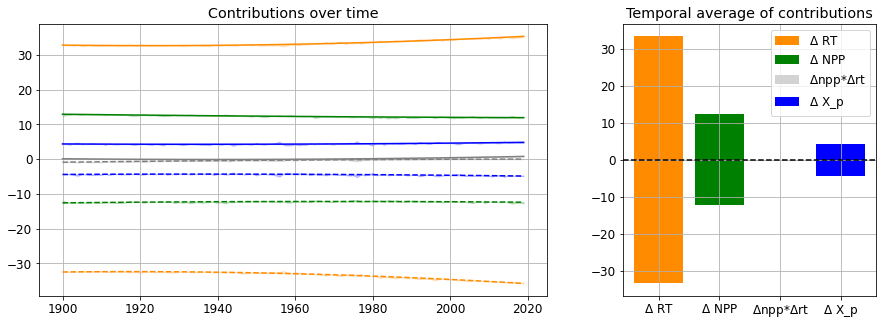

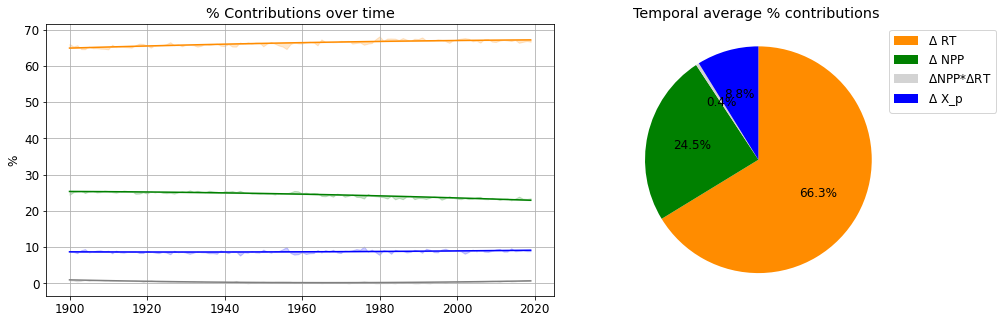

Attribution of summed deviations from the mean for all models to the differences in traceable components


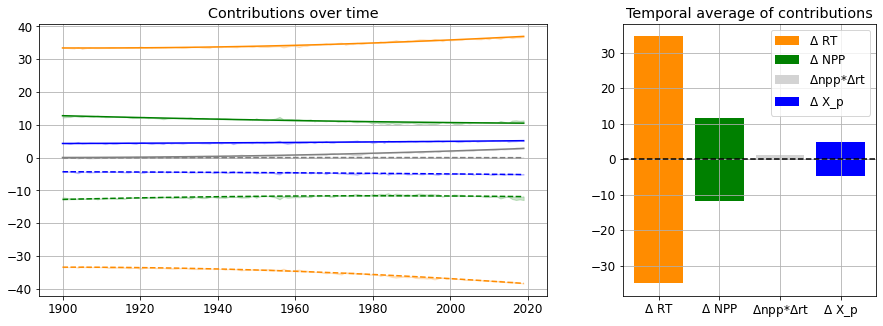

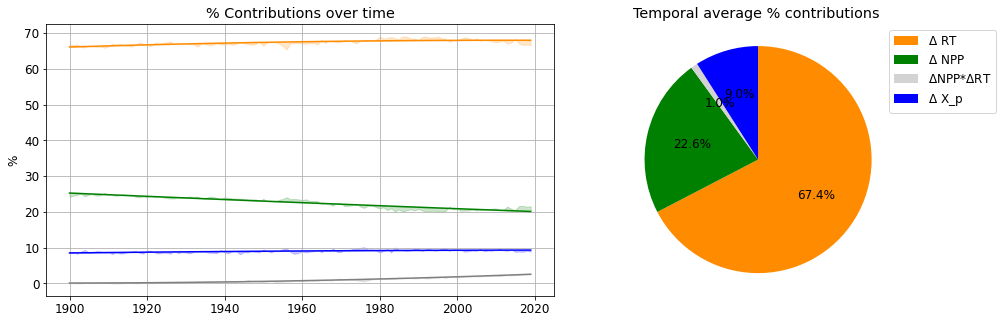

In [148]:
gh.plot_attribution_sum (
    all_comp_dict=all_comp_dict_S2,
    percent=True,
    part=1,
)
gh.plot_attribution_sum (
    all_comp_dict=all_comp_dict_S3,
    percent=True,
    part=1,
)